In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
bloomberg = pd.read_excel('C:/Users/panke/Downloads/WFU/finance risk/bloomberg.xlsx', index_col= 'Date', parse_dates=True)
bloomberg.head(10)

,DIS US Equity,INTC US Equity,NFLX US Equity,PYPL US Equity,WMT US Equity
Date,,,,,
2015-07-31,120.00,28.95,114.31,38.70,71.98
2015-08-31,101.88,28.54,115.03,35.00,64.73
2015-09-30,102.20,30.14,103.26,31.04,64.84
2015-10-30,113.74,33.86,108.38,36.01,57.24
2015-11-30,113.47,34.77,123.33,35.26,58.84
2015-12-31,105.08,34.45,114.38,36.20,61.30
2016-01-29,95.82,31.02,91.84,36.14,66.36
2016-02-29,95.52,29.59,93.41,38.14,66.34
2016-03-31,99.31,32.35,102.23,38.60,68.49


In [66]:
port_returns = []
port_risk = []
stock_weights = []
selected = ['Dis', 'INTC', 'NFLX', 'PYPL', 'WMT']

# set the number of combinations for portfolios
num_assets = len(selected)
num_portfolios = 50000

In [67]:
# calculate daily and annual returns of the stocks
returns_monthly = bloomberg.pct_change()
returns_annual = returns_monthly.mean() * 12

# get daily and covariance of returns of the stock
cov_monthly = returns_monthly.cov()
cov_annual = cov_daily * 12

In [68]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    risk = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_risk.append(risk)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Risk': port_risk}

In [69]:
# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)
df.head()

,Returns,Risk,Dis Weight,INTC Weight,NFLX Weight,PYPL Weight,WMT Weight
0,0.173795,0.138856,0.246943,0.214428,0.162550,0.168424,0.207656
1,0.168638,0.133944,0.185447,0.249994,0.147869,0.113631,0.303058
2,0.234906,0.165577,0.035419,0.391390,0.012872,0.508789,0.051530
3,0.239656,0.199931,0.040995,0.614331,0.304030,0.000368,0.040275
4,0.116922,0.129043,0.424883,0.026432,0.068221,0.201000,0.279464


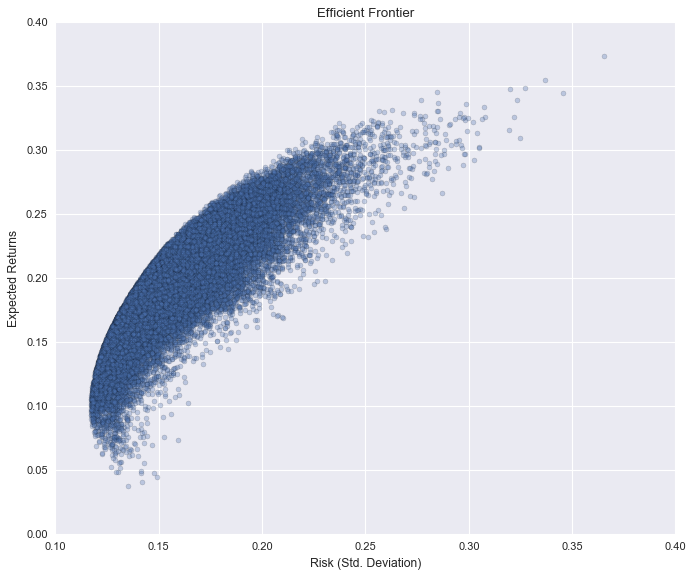

In [76]:
# get better labels for desired arrangement of columns
column_order = ['Returns', 'Risk'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Risk', y='Returns', figsize=(10, 8), grid=True, alpha = 0.3)
plt.xlabel('Risk (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()